## 💾 The data
The department has assembled data on almost 10,000 employees. The team used information from exit interviews, performance reviews, and employee records.

- "department" - the department the employee belongs to.
- "promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
- "review" - the composite score the employee received in their last evaluation.
- "projects" - how many projects the employee is involved in.
- "salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.
- "tenure" - how many years the employee has been at the company.
- "satisfaction" - a measure of employee satisfaction from surveys.
- "avg_hrs_month" - the average hours the employee worked in a month.
- "left" - "yes" if the employee ended up leaving, "no" otherwise.

In [1]:
#Snapshot of Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('./data/employee_churn_data.csv')
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [2]:
#Check for missing data
display(df.isna().any())

department       False
promoted         False
review           False
projects         False
salary           False
tenure           False
satisfaction     False
bonus            False
avg_hrs_month    False
left             False
dtype: bool

None of the columns have missing values.

In [3]:
df.groupby('left').mean()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
left,,,,,,,
no,0.034340,0.635164,3.279455,6.546625,0.505634,0.215068,184.637605
yes,0.020474,0.692262,3.263649,6.579382,0.502244,0.204741,184.719730


There are no major differences between the employees who stay and those who go.

In [4]:
#Getting a count of how many employees have left vs stayed.
pd.DataFrame(df.groupby('department')['left'].value_counts())

left
department  left      
IT          no     246
            yes    110
admin       no     304
            yes    119
engineering no    1079
            yes    437
finance     no     294
            yes    108
logistics   no     249
            yes    111
marketing   no     559
            yes    243
operations  no    1086
            yes    436
retail      no    1070
            yes    471
sales       no    1346
            yes    537
support     no     523
            yes    212

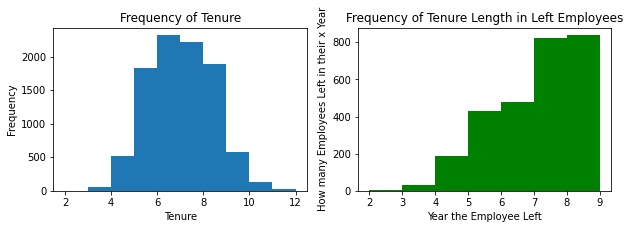

In [5]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
ax1.hist(df['tenure'], bins=10)
ax1.set_title('Frequency of Tenure')
ax1.set_xlabel('Tenure')
ax1.set_ylabel('Frequency')

#What year of tenure do Employees leave?
left_employees = df[df['left']=='yes']
ax2.hist(left_employees['tenure'], bins=7, color='g')
ax2.set_title('Frequency of Tenure Length in Left Employees')
ax2.set_xlabel('Year the Employee Left')
ax2.set_ylabel('How many Employees Left in their x Year')
plt.show()

The overall company tenure is a normal distribution. There are large jumps in departure in years 4/5 and 7/8. This is our biggest indicator of whether someone is likely to leave the company.

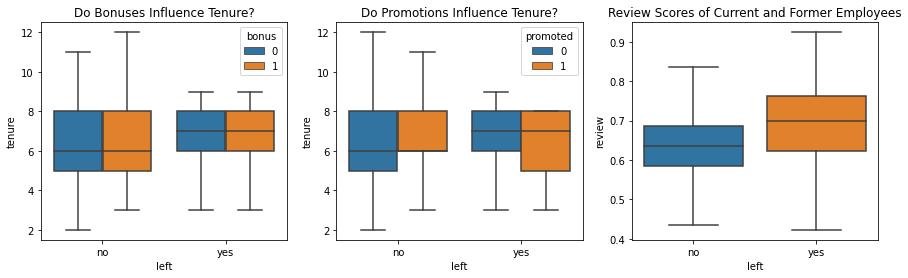

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
sns.boxplot(x = 'left', y = 'tenure', data = df, sym = '', hue = 'bonus', ax=ax1)
sns.boxplot(x = 'left', y = 'tenure', data = df, sym = '', hue = 'promoted', ax=ax2)
sns.boxplot(x = 'left', y = 'review', data = df, sym = '', ax=ax3)
ax1.set_title('Do Bonuses Influence Tenure?')
ax2.set_title('Do Promotions Influence Tenure?')
ax3.set_title('Review Scores of Current and Former Employees')

plt.show()

The employees who left had a longer median tenure. Whether they were promoted or not had no affect on their employment status. The same can be said about bonuses. Neither promotions nor bonuses kept employees around longer. However, former employees had significantly higher review scores. This means that the company is losing valuable employees to churn.

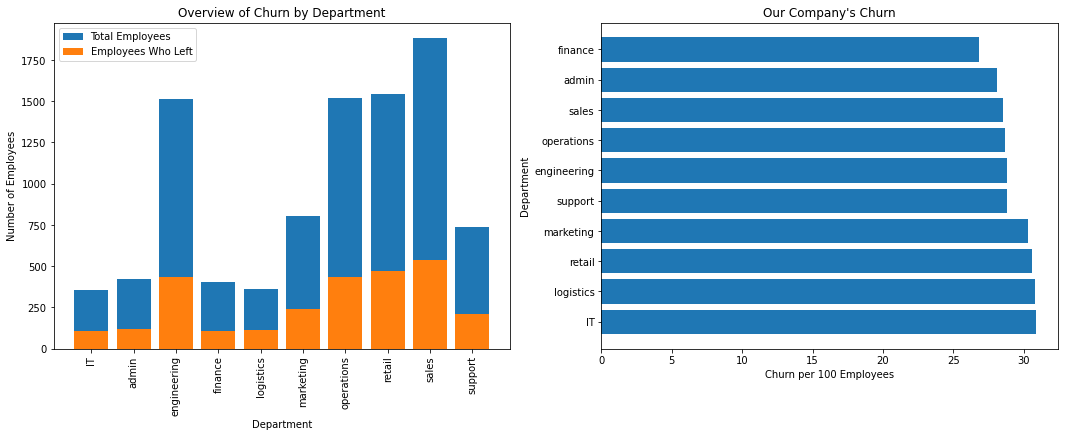

In [7]:
#Rank departments by employee turnover per 100 employees.
import matplotlib.pyplot as plt

#Group departments by total employees:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

departments_groupby_employees = df.groupby('department').agg({'left':'count'})
department_churn = df[df['left']=='yes'].groupby('department').agg({'left':'count'})

ax1.bar(departments_groupby_employees.index, departments_groupby_employees['left'], label="Total Employees")
ax1.bar(department_churn.index, department_churn['left'], label="Employees Who Left")
ax1.set_title('Overview of Churn by Department')
ax1.set_xlabel('Department')
ax1.set_xticklabels(departments_groupby_employees.index, rotation=90)
ax1.set_ylabel('Number of Employees')
ax1.legend()

#Filter by employees who have left
department_churn = df[df['left']=='yes'].groupby('department').agg({'left':'count'})

#Add Two New Columns to department_churn: Total Employees, churn_per_100
department_churn['total_employees'] = departments_groupby_employees['left']
department_churn['churn_per_100'] = 100 * department_churn['left'] / departments_groupby_employees['left']

#Sort by churn rate
department_churn_sorted = department_churn.sort_values('churn_per_100', ascending=False)
#display(department_churn_sorted)

#Create a bar graph
ax2.barh(department_churn_sorted.index, department_churn_sorted['churn_per_100'])
ax2.set_ylabel('Department')
ax2.set_xlabel('Churn per 100 Employees')
ax2.set_title("Our Company's Churn")

#Split df by current vs left employees
current = df[df['left'] == 'no']
left = df[df['left']=='yes']

#Analyze Columns of current employees
current_gb = current.groupby('department').agg({'promoted':'sum',
                                          'review':'mean',
                                          'projects':'mean',
                                          'tenure':'mean',
                                          'satisfaction':'median',
                                          'bonus':'sum',
                                          'avg_hrs_month':'mean',
                                          'left':'count',
                                     })
current_gb = current_gb.rename( columns = {'review':'avg_review',
                                     'projects':'avg_projects',
                                     'tenure':'avg_tenure',
                                     'satisfaction':'med_satisfaction',
                                     'left':'stayed',
                                     })
#display(current_gb)

#Analyze Columns of left employees
left_gb = left.groupby('department').agg({'promoted':'sum',
                                          'review':'mean',
                                          'projects':'mean',
                                          'tenure':'mean',
                                          'satisfaction':'median',
                                          'bonus':'sum',
                                          'avg_hrs_month':'mean',
                                     })
left_gb = left_gb.rename( columns = {'review':'avg_review',
                                     'projects':'avg_projects',
                                     'tenure':'avg_tenure',
                                     'satisfaction':'med_satisfaction',
                                     })
#display(left_gb)

#Merge department churn and left employee dataframes
department_churn = department_churn.merge(left_gb, on = 'department')
#display(department_churn)

plt.show()

When you take the size of each department into account, it looks like they all have similar rates of churn. A deeper look shows that all departments have lost between 26-31% of their employees, with IT and Logistics having the highest turnover. Finance had the lowest rate of turnover.

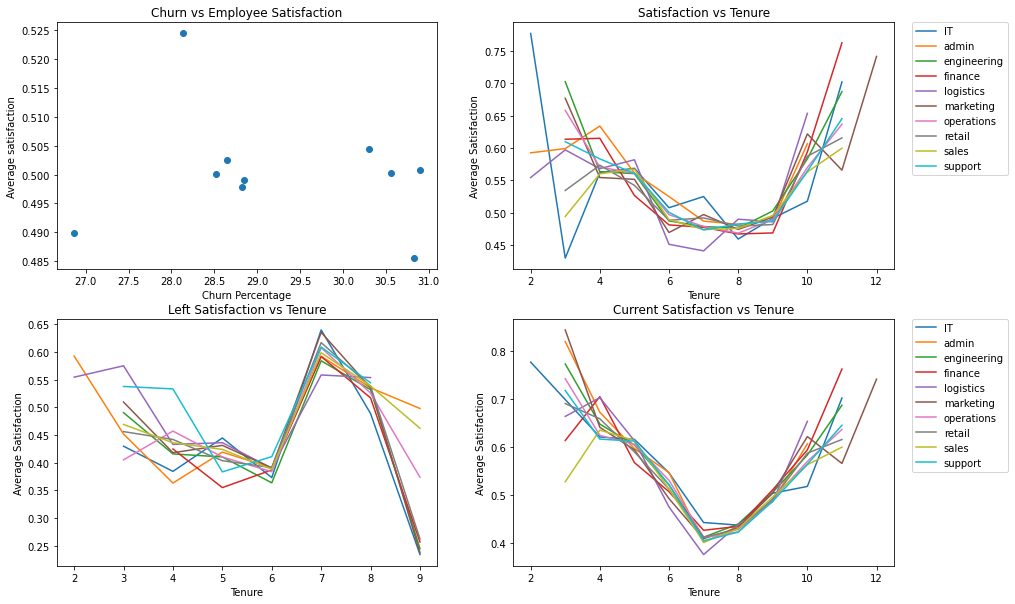

In [8]:
overall_avg_satisfaction = df.groupby('department').agg({'satisfaction':'median'})
#display(overall_avg_satisfaction)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
ax1.scatter(department_churn['churn_per_100'], overall_avg_satisfaction['satisfaction'])
ax1.set_xlabel('Churn Percentage')
ax1.set_ylabel('Average satisfaction')
ax1.set_title('Churn vs Employee Satisfaction')

#Overall Satisfaction v Tenure
tenure_sat = pd.DataFrame(df.groupby(['department','tenure'], as_index=False)['satisfaction'].mean())
#display(tenure_sat)
dpmt = list(department_churn.index)
for department in dpmt:
    ax2.plot(tenure_sat[tenure_sat['department'] == department]['tenure'], tenure_sat[tenure_sat['department'] == department]['satisfaction'], label=department)
ax2.set_xlabel('Tenure')
ax2.set_ylabel('Average Satisfaction')
ax2.set_title('Satisfaction vs Tenure')
ax2.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0)

#Left Satisfaction v Tenure
tenure_sat = left.groupby(['department','tenure'], as_index=False)['satisfaction'].mean()
#display(tenure_sat)
dpmt = list(department_churn.index)
for department in dpmt:
    ax3.plot(tenure_sat[tenure_sat['department'] == department]['tenure'], tenure_sat[tenure_sat['department'] == department]['satisfaction'], label=department)
ax3.set_xlabel('Tenure')
ax3.set_ylabel('Average Satisfaction')
ax3.set_title('Left Satisfaction vs Tenure')

#Current Satisfaction v Tenure
tenure_sat = current.groupby(['department','tenure'], as_index=False)['satisfaction'].mean()
#display(tenure_sat)
dpmt = list(department_churn.index)
for department in dpmt:
    ax4.plot(tenure_sat[tenure_sat['department'] == department]['tenure'], tenure_sat[tenure_sat['department'] == department]['satisfaction'], label=department)
ax4.set_xlabel('Tenure')
ax4.set_ylabel('Average Satisfaction')
ax4.set_title('Current Satisfaction vs Tenure')
ax4.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0)
plt.show()

The lack of correlation in the scatter plot seems to indicate satisfaction has no impact on churn. However, when we compare satisfaction with the tenure of the employee, we see a different story. Employee satisfaction starts off scattered, but every department dips between years 6 to 9. IT, our department with the highest churn, has a precipitous drop in worker satisfaction between years 2 and 3. Any workers who continued with our company make up a satisfied, senior group. We must address what is causing this dip.

Graphing the satisfaction of employees who left shows an even starker trend. In year 3, department-wide satisfaction is near the average: 0.5. Then, it dips below average from years 4-6. There is a department-wide jump in satisfaction in year 6 for these employees, but for some reason attitudes sour in years 7, 8, and 9.

Current employees sees an opposite trend. Satisfaction starts off above average, dips slightly below average in year 7, then rises back up again, with mostly happy employees after year 10.

What is the cause of this gap in employee satisfaction during year 7? What causes the trends that happen before and after year 7?

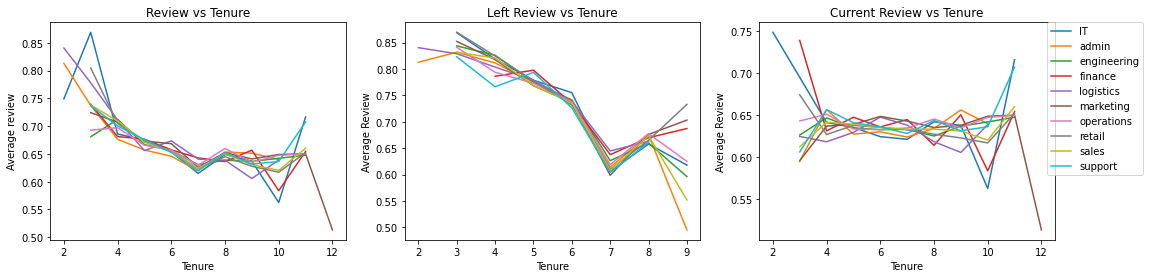

In [9]:
#Overall Review v Tenure
tenure_sat = pd.DataFrame(df.groupby(['department','tenure'], as_index=False)['review'].mean())
#display(tenure_sat)
dpmt = list(department_churn.index)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,4))
for department in dpmt:
    ax1.plot(tenure_sat[tenure_sat['department'] == department]['tenure'], tenure_sat[tenure_sat['department'] == department]['review'], label=department)
ax1.set_xlabel('Tenure')
ax1.set_ylabel('Average review')
ax1.set_title('Review vs Tenure')

#Left Review v Tenure
tenure_sat = left.groupby(['department','tenure'], as_index=False)['review'].mean()
#display(tenure_sat)
dpmt = list(department_churn.index)
for department in dpmt:
    ax2.plot(tenure_sat[tenure_sat['department'] == department]['tenure'], tenure_sat[tenure_sat['department'] == department]['review'], label=department)
ax2.set_xlabel('Tenure')
ax2.set_ylabel('Average Review')
ax2.set_title('Left Review vs Tenure')

#Current Review v Tenure
tenure_sat = current.groupby(['department','tenure'], as_index=False)['review'].mean()
#display(tenure_sat)
dpmt = list(department_churn.index)
for department in dpmt:
    ax3.plot(tenure_sat[tenure_sat['department'] == department]['tenure'], tenure_sat[tenure_sat['department'] == department]['review'], label=department)
ax3.set_xlabel('Tenure')
ax3.set_ylabel('Average Review')
ax3.set_title('Current Review vs Tenure')
ax3.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0)

plt.show()

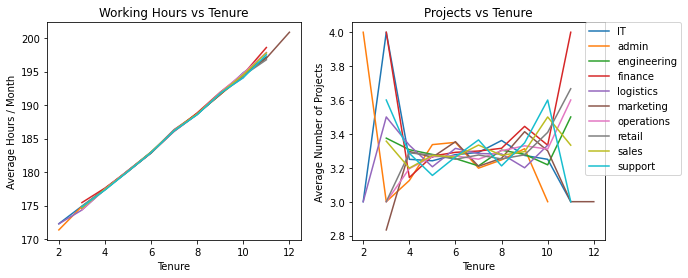

In [10]:
#Overall Work Hours v Tenure
tenure_sat = pd.DataFrame(df.groupby(['department','tenure'], as_index=False)['avg_hrs_month'].mean())
#display(tenure_sat)
dpmt = list(department_churn.index)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
for department in dpmt:
    ax1.plot(tenure_sat[tenure_sat['department'] == department]['tenure'], tenure_sat[tenure_sat['department'] == department]['avg_hrs_month'], label=department)
ax1.set_xlabel('Tenure')
ax1.set_ylabel('Average Hours / Month')
ax1.set_title('Working Hours vs Tenure')

#Overall Projects v Tenure
tenure_sat = pd.DataFrame(df.groupby(['department','tenure'], as_index=False)['projects'].mean())
#display(tenure_sat)
dpmt = list(department_churn.index)
for department in dpmt:
    ax2.plot(tenure_sat[tenure_sat['department'] == department]['tenure'], tenure_sat[tenure_sat['department'] == department]['projects'], label=department)
ax2.set_xlabel('Tenure')
ax2.set_ylabel('Average Number of Projects')
ax2.set_title('Projects vs Tenure')
ax2.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0)

plt.show()

This Linear Relationship between tenure and average hours per month is strong, and it could explain the changes in satisfaction or why so many workers leave after year 7. The number of projects employees take on as they work for the company does not indicate any correlation.

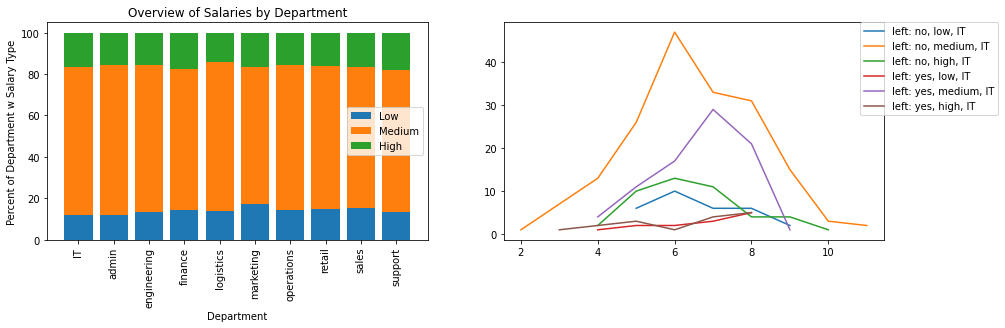

In [11]:
#Group departments by total employees:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

sal_count_low = df[df['salary'] == 'low'].groupby(['department']).agg({'salary':'count'})
sal_count_med = df[df['salary'] == 'medium'].groupby(['department']).agg({'salary':'count'})
sal_count_hi = df[df['salary'] == 'high'].groupby(['department']).agg({'salary':'count'})

sal_count_low['pct'] = 100 * sal_count_low['salary'] / department_churn['total_employees']
sal_count_med['pct'] = 100 * sal_count_med['salary'] / department_churn['total_employees']
sal_count_hi['pct'] = 100 * sal_count_hi['salary'] / department_churn['total_employees']

ax1.bar(department_churn.index, sal_count_low['pct'], label="Low")
ax1.bar(department_churn.index, sal_count_med['pct'], label="Medium", bottom = sal_count_low['pct'])
ax1.bar(department_churn.index, sal_count_hi['pct'], label="High", bottom = sal_count_low['pct'] + sal_count_med['pct'])

ax1.set_title('Overview of Salaries by Department')
ax1.set_xlabel('Department')
ax1.set_xticklabels(departments_groupby_employees.index, rotation=90)
ax1.set_ylabel('Percent of Department w Salary Type')
ax1.legend()

#Investigating IT Department Salaries vs Tenure
def dpmt_sal_ten(department, salary, left):
    it_low = df[(df['department'] == department) & (df['salary'] == salary)].groupby(['left', 'tenure'], as_index=False).count()
    ax2.plot(it_low[it_low['left'] == left]['tenure'], it_low[it_low['left'] == left]['department'], label=f"left: {left}, {salary}, {department}")

dpmt_sal_ten('IT', 'low', 'no')
dpmt_sal_ten('IT', 'medium', 'no')
dpmt_sal_ten('IT', 'high', 'no')
dpmt_sal_ten('IT', 'low', 'yes')
dpmt_sal_ten('IT', 'medium', 'yes')
dpmt_sal_ten('IT', 'high', 'yes')

ax2.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0)
plt.show()

Every department has a similar percentage of employees making low, medium, and high salaries.

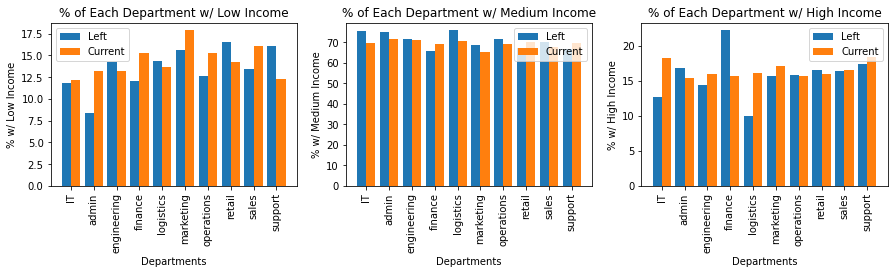

In [12]:
import numpy as np

#Low Salary
department_churn['low_sal'] = left[left['salary'] == 'low'].groupby('department').agg({'salary':'count'})
department_churn['low_sal_pct'] = 100 * department_churn['low_sal'] / department_churn['left']

current_gb['low_sal'] = current[current['salary'] == 'low'].groupby('department').agg({'salary':'count'})
current_gb['low_sal_pct'] = 100 * current_gb['low_sal'] / current_gb['stayed']
#display(department_churn[['low_sal_pct']],current_gb[['low_sal_pct']])                                                                                       
#Med Salary
department_churn['med_sal'] = left[left['salary'] == 'medium'].groupby('department').agg({'salary':'count'})
department_churn['med_sal_pct'] = 100 * department_churn['med_sal'] / department_churn['left']

current_gb['med_sal'] = current[current['salary'] == 'medium'].groupby('department').agg({'salary':'count'})
current_gb['med_sal_pct'] = 100 * current_gb['med_sal'] / current_gb['stayed']
#display(department_churn[['med_sal_pct']],current_gb[['med_sal_pct']])

#High Salary
department_churn['hi_sal'] = left[left['salary'] == 'high'].groupby('department').agg({'salary':'count'})
department_churn['hi_sal_pct'] = 100 * department_churn['hi_sal'] / department_churn['left']

current_gb['hi_sal'] = current[current['salary'] == 'high'].groupby('department').agg({'salary':'count'})
current_gb['hi_sal_pct'] = 100 * current_gb['hi_sal'] / current_gb['stayed']
#display(department_churn[['hi_sal_pct']],current_gb[['hi_sal_pct']])

fig, ax = plt.subplots(1,3, figsize=(15,3))
X = list(department_churn.index)
X_axis = np.arange(len(department_churn.index))
ax[0].bar(X_axis - 0.2, department_churn['low_sal_pct'], 0.4, label = 'Left')
ax[0].bar(X_axis + 0.2, current_gb['low_sal_pct'], 0.4, label = 'Current')
ax[0].set_xticks(X_axis)
ax[0].set_xticklabels(X, rotation = 90)
ax[0].set_xlabel('Departments')
ax[0].set_ylabel('% w/ Low Income')
ax[0].set_title('% of Each Department w/ Low Income')
ax[0].legend()

ax[1].bar(X_axis - 0.2, department_churn['med_sal_pct'], 0.4, label = 'Left')
ax[1].bar(X_axis + 0.2, current_gb['med_sal_pct'], 0.4, label = 'Current')
ax[1].set_xticks(X_axis)
ax[1].set_xticklabels(X, rotation = 90)
ax[1].set_xlabel('Departments')
ax[1].set_ylabel('% w/ Medium Income')
ax[1].set_title('% of Each Department w/ Medium Income')
ax[1].legend()

ax[2].bar(X_axis - 0.2, department_churn['hi_sal_pct'], 0.4, label = 'Left')
ax[2].bar(X_axis + 0.2, current_gb['hi_sal_pct'], 0.4, label = 'Current')
ax[2].set_xticks(X_axis)
ax[2].set_xticklabels(X, rotation = 90)
ax[2].set_xlabel('Departments')
ax[2].set_ylabel('% w/ High Income')
ax[2].set_title('% of Each Department w/ High Income')
ax[2].legend()
plt.show()

These graphs however show that there might be some correlation between salary and churn within the departments. IT and logistics have the highest churn, and they also had the lowest percentage of high salaried churners. Logistics in particular is lagging behind in high salaried employees overall. It indicates that in these departments, if employees are paid more, they are less likely to leave.

## Conclusions

1. IT and logistics have the highest turnover. Finance has the lowest.

2. Tenure and salary are the best predictors of employee departure. Employees more and more likely to leave in their 4th year and beyond. A high salary in the IT and logistics departments in particular reduces chances of churn.

3. I would recommend incentivizing employees that are in their 3rd and 4th years to stay by paying them higher salaries. I would also emphasize a clear path of progression so that they feel like they will be rewarded for continuing to work at the company past years 8 and 9.